In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions, MobileNetV2
from tensorflow.keras.preprocessing import image
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import os

In [3]:
# Load model
model = MobileNetV2(weights='imagenet')

In [5]:
def classify_image_advanced(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        predictions = model.predict(img_array)
        decoded = decode_predictions(predictions, top=3)[0]

        # Show image
        plt.imshow(img)
        plt.axis('off')
        plt.title("Image Preview")
        plt.show()

        # Show predictions with confidence bars
        labels = [label for (_, label, _) in decoded]
        scores = [score for (_, _, score) in decoded]
        print("Predictions:")
        for i in range(3):
            print(f"{i+1}. {labels[i]} ({scores[i]*100:.2f}%)")

        plt.barh(labels, scores, color='skyblue')
        plt.xlabel("Confidence")
        plt.title("Top-3 Predictions")
        plt.xlim([0, 1])
        plt.gca().invert_yaxis()
        plt.show()

        return {
            "image": os.path.basename(img_path),
            "top1_label": labels[0],
            "top1_score": scores[0],
            "top2_label": labels[1],
            "top2_score": scores[1],
            "top3_label": labels[2],
            "top3_score": scores[2],
        }

    except Exception as e:
        print(f"Error: {e}")
        return None

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


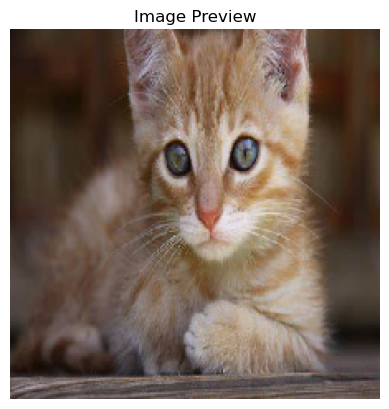

Predictions:
1. tiger_cat (41.46%)
2. Egyptian_cat (24.51%)
3. tabby (18.69%)


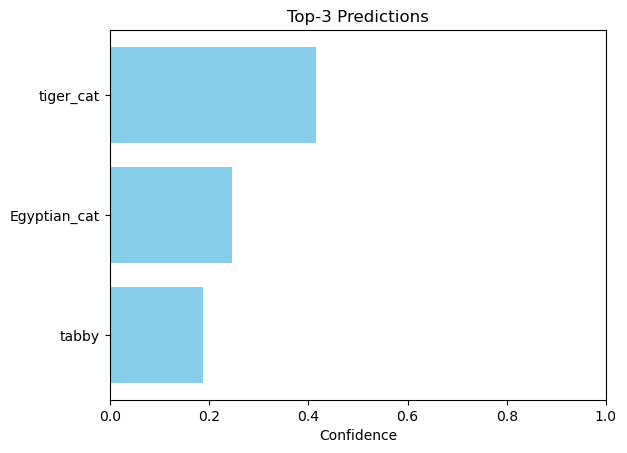

{'image': 'cat.jpeg',
 'top1_label': 'tiger_cat',
 'top1_score': 0.4146367,
 'top2_label': 'Egyptian_cat',
 'top2_score': 0.24505524,
 'top3_label': 'tabby',
 'top3_score': 0.1869226}

In [7]:
# === SINGLE IMAGE TEST ===
classify_image_advanced(r"C:/Users/amrut/Downloads/cat.jpeg")

0it [00:00, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


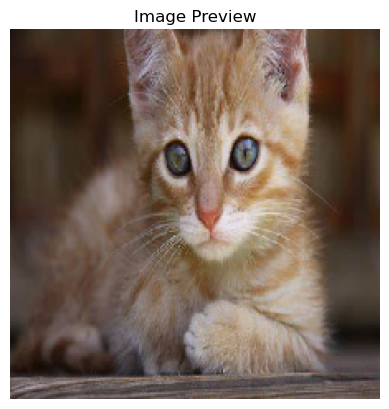

Predictions:
1. tiger_cat (41.46%)
2. Egyptian_cat (24.51%)
3. tabby (18.69%)


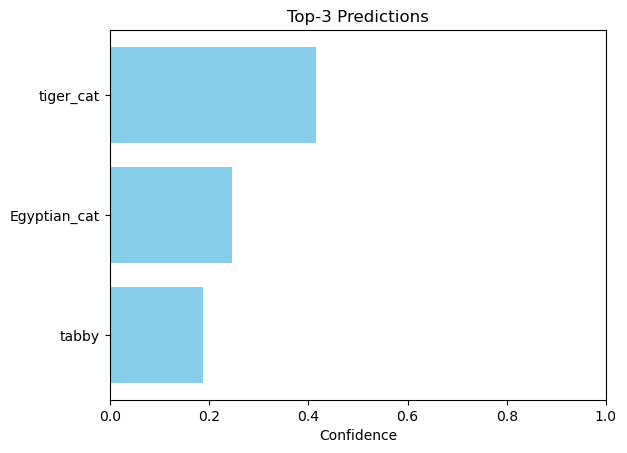

1it [00:01,  1.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


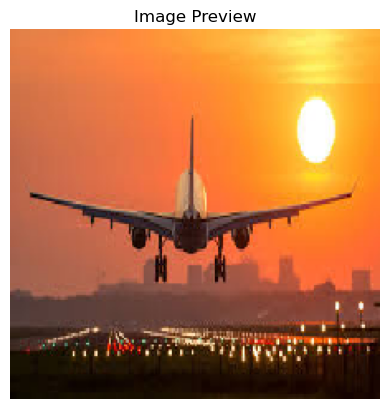

Predictions:
1. airliner (81.42%)
2. warplane (8.43%)
3. aircraft_carrier (1.52%)


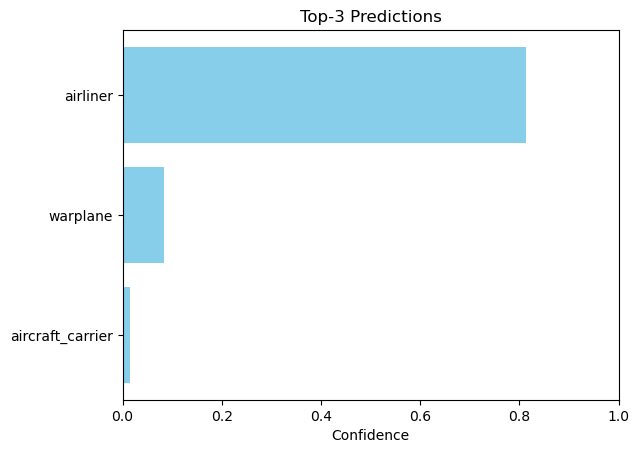

2it [00:02,  1.03s/it]


In [19]:
# === MULTIPLE IMAGES IN FOLDER ===
image_dir = "C:/Users/amrut/Downloads/test_images"
results = []

for img_file in tqdm(Path(image_dir).glob("*.*")):
    if img_file.suffix.lower() in [".jpg", ".jpeg", ".png"]:
        res = classify_image_advanced(str(img_file))
        if res:
            results.append(res)

In [21]:
# Save results
if results:
    df = pd.DataFrame(results)
    df.to_csv("classification_results.csv", index=False)
    print("Results saved to classification_results.csv ✅")

Results saved to classification_results.csv ✅
